In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
coordinates

[(28.382686069461712, 113.02700676524216),
 (83.7178255659856, 82.25084996783238),
 (-38.845837375994506, -24.3805745986557),
 (-8.343157253426128, 151.1312400659245),
 (45.43719930067675, -41.21686481466696),
 (63.07813212643862, 139.2789428442748),
 (-19.368431712147043, -128.37052590968025),
 (13.869738021683318, 45.157567362299176),
 (-30.59555286257759, -81.02734480584397),
 (64.16654137599627, 55.574552044581054),
 (74.69822897793597, 179.33891024941988),
 (-12.150760596436072, 23.826379131376797),
 (-45.61485657960198, 88.41482515685675),
 (26.83912640538091, -38.40832821880454),
 (78.25068685555996, 158.50355494088518),
 (-69.57578659064492, -50.262916130605475),
 (88.81101164495811, 26.664919044944156),
 (34.5184479646648, 126.79853975288461),
 (-44.98788313758634, -49.86374498302342),
 (-27.09446937809411, 60.59911973339268),
 (88.93539234189973, 109.48583635303572),
 (52.10455396282077, 88.26294725067459),
 (-15.148613944329654, 21.99623971858597),
 (-47.15322816059937, -141

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

596

In [7]:
import requests
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [12]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 12 | ningxiang
Processing Record 2 of Set 12 | dikson
Processing Record 3 of Set 12 | arraial do cabo
Processing Record 4 of Set 12 | alotau
City not found. Skipping...
Processing Record 5 of Set 12 | torbay
Processing Record 6 of Set 12 | solnechnyy
Processing Record 7 of Set 12 | rikitea
Processing Record 8 of Set 12 | lahij
Processing Record 9 of Set 12 | coquimbo
Processing Record 10 of Set 12 | nizhniy odes
Processing Record 11 of Set 12 | leningradskiy
Processing Record 12 of Set 12 | mwinilunga
Processing Record 13 of Set 12 | busselton
Processing Record 14 of Set 12 | ribeira grande
Processing Record 15 of Set 12 | cherskiy
Processing Record 16 of Set 12 | ushuaia
Processing Record 17 of Set 12 | longyearbyen
Processing Record 18 of Set 12 | fukue
Processing Record 19 of Set 12 | mar del plata
Processing Record 20 of Set 12 | souillac
Processing Record 21 of Set 12 | saskylakh
Processing Record 22 of Set 12 | tashtagol
Processing Record 23 of Set 12 |

Processing Record 35 of Set 15 | pevek
Processing Record 36 of Set 15 | san quintin
Processing Record 37 of Set 15 | smithers
Processing Record 38 of Set 15 | kasongo
Processing Record 39 of Set 15 | viedma
Processing Record 40 of Set 15 | deputatskiy
Processing Record 41 of Set 15 | oranjemund
Processing Record 42 of Set 15 | salalah
Processing Record 43 of Set 15 | bonoua
Processing Record 44 of Set 15 | bambous virieux
Processing Record 45 of Set 15 | illoqqortoormiut
City not found. Skipping...
Processing Record 46 of Set 15 | chifeng
Processing Record 47 of Set 15 | slave lake
Processing Record 48 of Set 15 | kpandu
Processing Record 49 of Set 15 | ligayan
Processing Record 50 of Set 15 | butaritari
Processing Record 1 of Set 16 | hofn
Processing Record 2 of Set 16 | coihaique
Processing Record 3 of Set 16 | tumannyy
City not found. Skipping...
Processing Record 4 of Set 16 | okhotsk
Processing Record 5 of Set 16 | vardo
Processing Record 6 of Set 16 | kamenskoye
City not found. S

Processing Record 19 of Set 19 | pemangkat
Processing Record 20 of Set 19 | spirit river
Processing Record 21 of Set 19 | surt
Processing Record 22 of Set 19 | quatre cocos
Processing Record 23 of Set 19 | attawapiskat
City not found. Skipping...
Processing Record 24 of Set 19 | changli
Processing Record 25 of Set 19 | morondava
Processing Record 26 of Set 19 | tateyama
Processing Record 27 of Set 19 | kupang
Processing Record 28 of Set 19 | te anau
Processing Record 29 of Set 19 | mallasamudram
Processing Record 30 of Set 19 | chalinze
Processing Record 31 of Set 19 | mocuba
Processing Record 32 of Set 19 | santa lucia
Processing Record 33 of Set 19 | constitucion
Processing Record 34 of Set 19 | sumkino
Processing Record 35 of Set 19 | zhanatas
City not found. Skipping...
Processing Record 36 of Set 19 | clyde river
Processing Record 37 of Set 19 | urucara
Processing Record 38 of Set 19 | toowoomba
Processing Record 39 of Set 19 | karaul
City not found. Skipping...
Processing Record 

Processing Record 2 of Set 23 | vila velha
Processing Record 3 of Set 23 | winneba
Processing Record 4 of Set 23 | katangli
Processing Record 5 of Set 23 | sur
Processing Record 6 of Set 23 | nador
Processing Record 7 of Set 23 | dori
Processing Record 8 of Set 23 | biak
Processing Record 9 of Set 23 | menongue
Processing Record 10 of Set 23 | malanje
Processing Record 11 of Set 23 | kalmunai
Processing Record 12 of Set 23 | hare bay
Processing Record 13 of Set 23 | gorom-gorom
Processing Record 14 of Set 23 | zhirnovsk
Processing Record 15 of Set 23 | cockburn town
Processing Record 16 of Set 23 | issia
Processing Record 17 of Set 23 | ruatoria
City not found. Skipping...
Processing Record 18 of Set 23 | albanel
Processing Record 19 of Set 23 | chipinge
Processing Record 20 of Set 23 | arman
Processing Record 21 of Set 23 | antalya
Processing Record 22 of Set 23 | careiro da varzea
Processing Record 23 of Set 23 | rawah
Processing Record 24 of Set 23 | atar
Processing Record 25 of Set

In [13]:
len(city_data)

547

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ningxiang,37.3400,111.2052,50.41,91,17,3.09,CN,2021-09-19 18:35:46
1,Dikson,73.5069,80.5464,36.41,86,100,18.41,RU,2021-09-19 18:35:35
2,Arraial Do Cabo,-22.9661,-42.0278,78.76,78,20,9.22,BR,2021-09-19 18:34:35
3,Torbay,47.6666,-52.7314,61.48,93,90,10.36,CA,2021-09-19 18:35:47
4,Solnechnyy,50.7214,136.6319,45.66,56,0,9.24,RU,2021-09-19 18:35:47
5,Rikitea,-23.1203,-134.9692,73.72,75,0,11.92,PF,2021-09-19 18:35:47
6,Lahij,13.1667,44.5833,89.65,44,39,6.67,YE,2021-09-19 18:35:48
7,Coquimbo,-29.9533,-71.3436,58.73,67,75,8.05,CL,2021-09-19 18:35:48
8,Nizhniy Odes,63.6445,54.8560,37.22,67,100,10.96,RU,2021-09-19 18:35:13
9,Leningradskiy,69.3833,178.4167,26.53,86,87,22.73,RU,2021-09-19 18:35:48


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_new = city_data_df[new_column_order]
city_data_new.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ningxiang,CN,2021-09-19 18:35:46,37.3400,111.2052,50.41,91,17,3.09
1,Dikson,RU,2021-09-19 18:35:35,73.5069,80.5464,36.41,86,100,18.41
2,Arraial Do Cabo,BR,2021-09-19 18:34:35,-22.9661,-42.0278,78.76,78,20,9.22
3,Torbay,CA,2021-09-19 18:35:47,47.6666,-52.7314,61.48,93,90,10.36
4,Solnechnyy,RU,2021-09-19 18:35:47,50.7214,136.6319,45.66,56,0,9.24


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_new.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

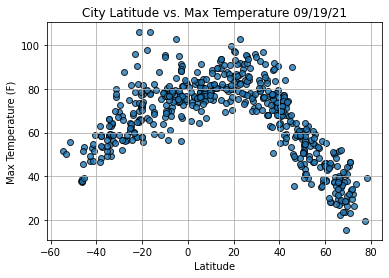

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

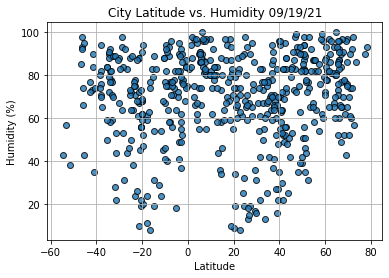

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

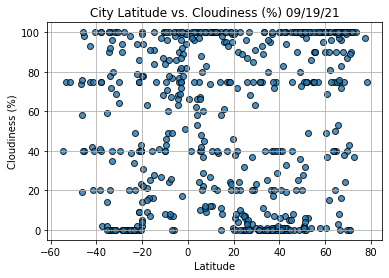

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


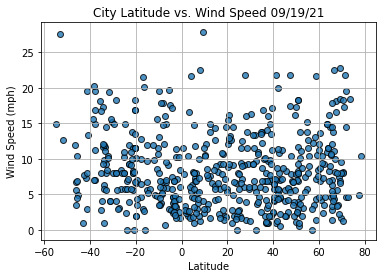

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()
